In [13]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [14]:
iris = datasets.load_iris()
X = iris["data"][:, (2,3)]
y = (iris["target"] == 2).astype(float)

In [15]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [16]:
svm_clf.predict([[5.5,1.7]])

array([1.])

Another substitute for this model could be a ```SVC(kernel="linear", C=1)``` (which is much slower) or \
```SGDClassifier(loss="hinge", alpha=(1/m*c))``` (is still slower but manages better big datasets)

## Non-linear SVM Classfication

In [17]:
moons = datasets.make_moons()
X_moon, y_moon = moons[0], moons[1]

In [18]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(X_moon, y_moon)

c:\Users\Roi_f\anaconda3\envs\personal\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

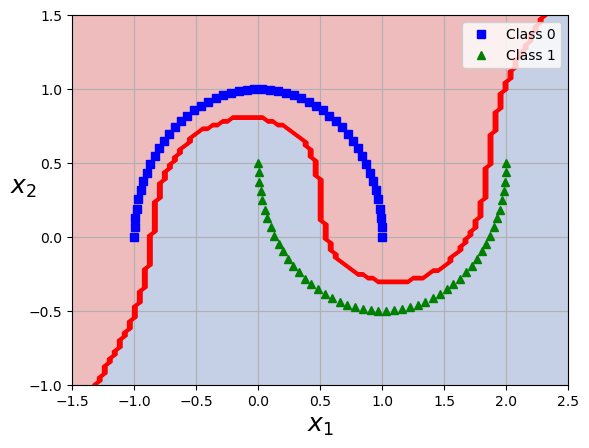

In [19]:
import matplotlib.pyplot as plt

# Define function to plot the decision boundary
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], xlabel=r"$x_1$", ylabel=r"$x_2$"):
    # Create a grid of points to evaluate the model
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]

    # Predict using the pipeline
    y_predict = clf.predict(X_new).reshape(x0.shape)

    # Plot decision boundary
    custom_cmap = plt.cm.RdYlBu
    plt.contourf(x0, x1, y_predict, alpha=0.3, cmap=custom_cmap)
    plt.contour(x0, x1, y_predict, colors='red', linewidths=1)

    # Plot original data points
    plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Class 0")
    plt.plot(X[y == 1, 0], X[y == 1, 1], "g^", label="Class 1")

    # Labels and axes
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.legend()
    plt.axis(axes)
    plt.grid(True)
    plt.show()

# Call the function
plot_decision_boundary(polynomial_svm_clf, X_moon, y_moon)


## Polynomial Kernel

In [20]:
from sklearn.svm import SVC

poly_kernel_svc_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svc_clf.fit(X_moon, y_moon)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

## Gaussin RBF Kernel

In [21]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(X_moon, y_moon)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

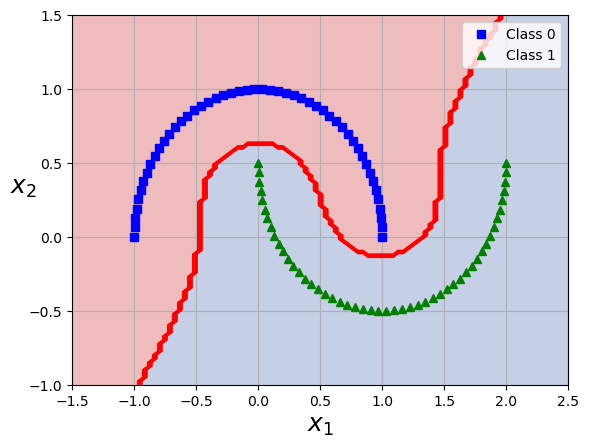

In [22]:
plot_decision_boundary(rbf_kernel_svm_clf, X_moon, y_moon)

# SVC Regression

In [23]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5) #Create a SVM linear regression 
svm_reg.fit(X,y)

LinearSVR(epsilon=1.5)

In [24]:
from sklearn.svm import SVR

svm_reg_cuad = SVR(kernel="poly", degree=2, C=100, epsilon=0.1) #Create a SVM cuadratic regression
svm_reg_cuad.fit(X, y)

SVR(C=100, degree=2, kernel='poly')